In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import *
from tqdm import tqdm

In [9]:

def f(x, a, b):
    return a * sin(x) + b

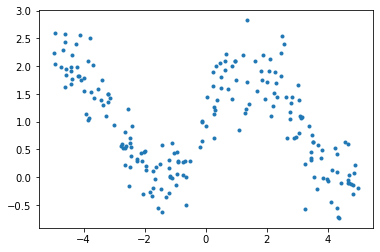

In [10]:
A = 1
K = 1

x = []
y = []
for i in range(200):
    x0=random.uniform(-5,5)
    y0=f(x0,A,K)+random.gauss(0,0.4)
    x.append(x0)
    y.append(y0)
plt.plot(x,y,'.')
plt.show()

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:46<00:00, 2145.86it/s]


0.44786195165469106 0.764303540162709 1.0506050908889433


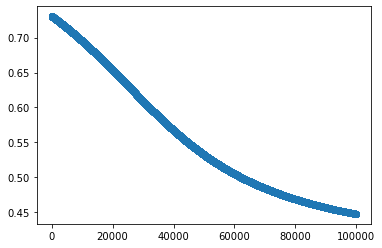

In [11]:
bestLoss = 1e9
bestA, bestB = 1, 1
dt = 0.00001

lossHistory = []
aHistory, bHistory = [], []
chi=[]
a, b = 0.5, 0.5
for i in tqdm(range(100000)):
    aGrad = [2*sin(b*x[i])*(y[i]-f(x[i],a,b)) for i in range(len(y))]
    bGrad = [2*a*x[i]*cos(b*x[i])*(y[i]-f(x[i],a,b)) for i in range(len(y))]
    a += sum(aGrad)/len(aGrad)*dt
    b += sum(bGrad)/len(bGrad)*dt
    #print(a,b)
  
    reses = [(y[i]-f(x[i],a,b))**2 for i in range(len(y))]
    loss = sqrt(sum(reses)/len(reses))
    lossHistory.append(loss)
    aHistory.append(a)
    bHistory.append(b)
    if loss < bestLoss:
        bestA, bestB = a, b
        bestLoss = loss
        
        chi_ = sum([(y[i]-f(x[i],a,b))**2/0.1**2 for i in range(len(y))])
        chi.append(chi_)
print(bestLoss, bestA, bestB)
plt.plot(lossHistory, '-o');

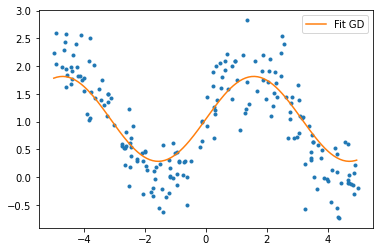

In [12]:
x0, x1 = min(x), max(x)
plt.plot(x, y, '.');

x_list=np.array([-5+i*10/len(x) for i in range(len(x))])
y_list=np.array([f(x_list[i],bestA,bestB) for i in range(len(x))])
plt.plot(x_list,y_list, label = 'Fit GD')
plt.legend()
plt.show()

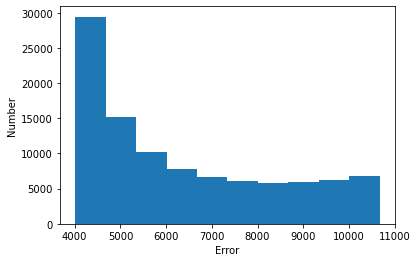

In [13]:
plt.hist(chi)
plt.xlabel('Error')
plt.ylabel('Number')
plt.show()